In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# 1. Membaca dataset
df = pd.read_csv('dataset.csv', encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [14]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (541909, 8)


In [16]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
df_original = df.copy()  # Simpan data asli untuk perbandingan

# --- Mendeteksi data duplikat ---
print("Shape data asli:", df.shape)
duplicate_count = df.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

# --- Mendeteksi missing values ---
missing_values = df.isnull().sum()
print("\nMissing values pada tiap kolom:\n", missing_values)

Shape data asli: (541909, 8)
Jumlah data duplikat: 5268

Missing values pada tiap kolom:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [18]:
# --- Fungsi untuk menghapus outlier menggunakan metode IQR ---
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [19]:
# Salin dataframe untuk pembersihan
df_cleaned = df.copy()

# --- Menghapus duplikat ---
df_cleaned = df_cleaned.drop_duplicates()

# --- Menghapus baris dengan missing values ---
df_cleaned = df_cleaned.dropna()

# --- Menghapus outlier pada kolom Quantity dan UnitPrice ---
df_cleaned = remove_outliers(df_cleaned, 'Quantity')
df_cleaned = remove_outliers(df_cleaned, 'UnitPrice')

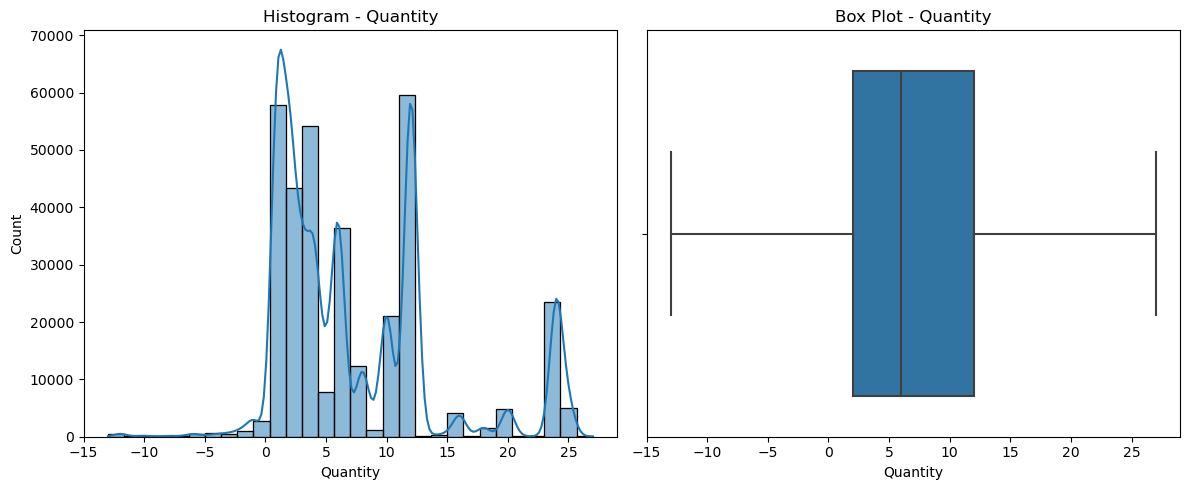

In [20]:
# --- Visualisasi Histogram dan Box Plot ---

# Histogram dan box plot untuk Quantity
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Quantity'], bins=30, kde=True)
plt.title("Histogram - Quantity")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Quantity'])
plt.title("Box Plot - Quantity")
plt.tight_layout()
plt.show()

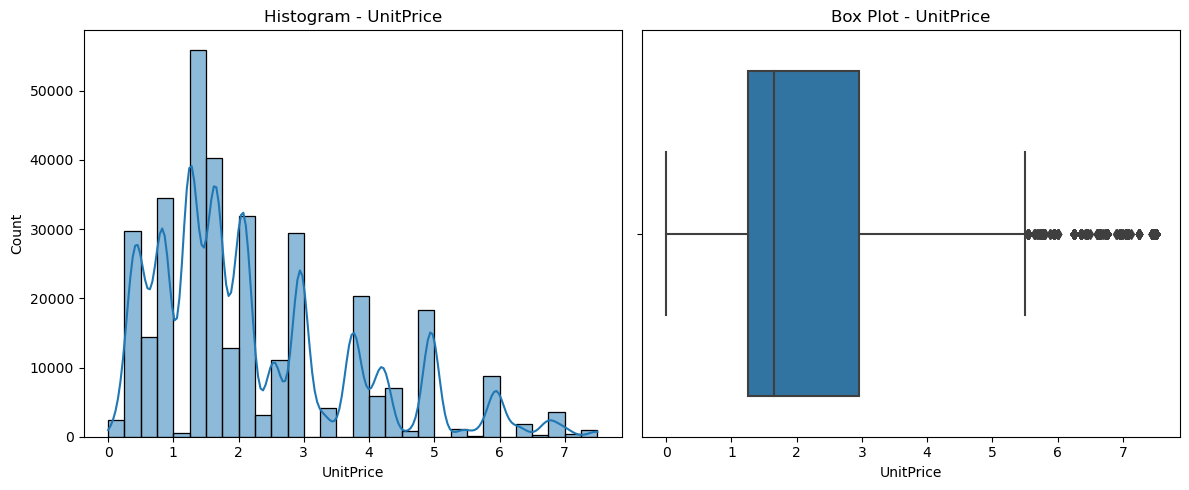

In [21]:
# Histogram dan box plot untuk UnitPrice
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['UnitPrice'], bins=30, kde=True)
plt.title("Histogram - UnitPrice")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['UnitPrice'])
plt.title("Box Plot - UnitPrice")
plt.tight_layout()
plt.show()

In [22]:
# --- Perbandingan Data Sebelum dan Sesudah Cleaning ---
print("Jumlah baris sebelum cleaning:", df_original.shape[0])
print("Jumlah baris setelah cleaning:", df_cleaned.shape[0])
print("\nStatistik deskriptif sebelum cleaning:")
print(df_original.describe())
print("\nStatistik deskriptif setelah cleaning:")
print(df_cleaned.describe())

Jumlah baris sebelum cleaning: 541909
Jumlah baris setelah cleaning: 339453

Statistik deskriptif sebelum cleaning:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

Statistik deskriptif setelah cleaning:
            Quantity      UnitPrice     CustomerID
count  339453.000000  339453.000000  339453.000000
mean        7.350022       2.203459   15312.608184
std         6.890369       1.549676    1711.910209
min       -13.000000       0.000000   12347.000000
25%         2.000000       1.250000   13983.000000
50%         6.000000       1.650000   15218.000000
75%        12.000000       2

In [23]:
# --- Menyimpan dataset hasil cleaning ---
df_cleaned.to_csv('data-cleaned.csv', index=False)

In [24]:
# Membaca dataset hasil cleaning
df_cleaned = pd.read_csv('data-cleaned.csv')

# Menghitung profit per baris
df_cleaned['Profit'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [25]:
# --- Metrik Terukur ---
total_transactions = len(df_cleaned)
total_profit = df_cleaned['Profit'].sum()
total_customers = df_cleaned['CustomerID'].count()
total_unique_customers = df_cleaned['CustomerID'].nunique()

print("Total Transactions:", total_transactions)
print("Total Profit:", total_profit)
print("Total Customers:", total_customers)
print("Total Unique Customers:", total_unique_customers)

Total Transactions: 339453
Total Profit: 4250659.2639999995
Total Customers: 339453
Total Unique Customers: 4222


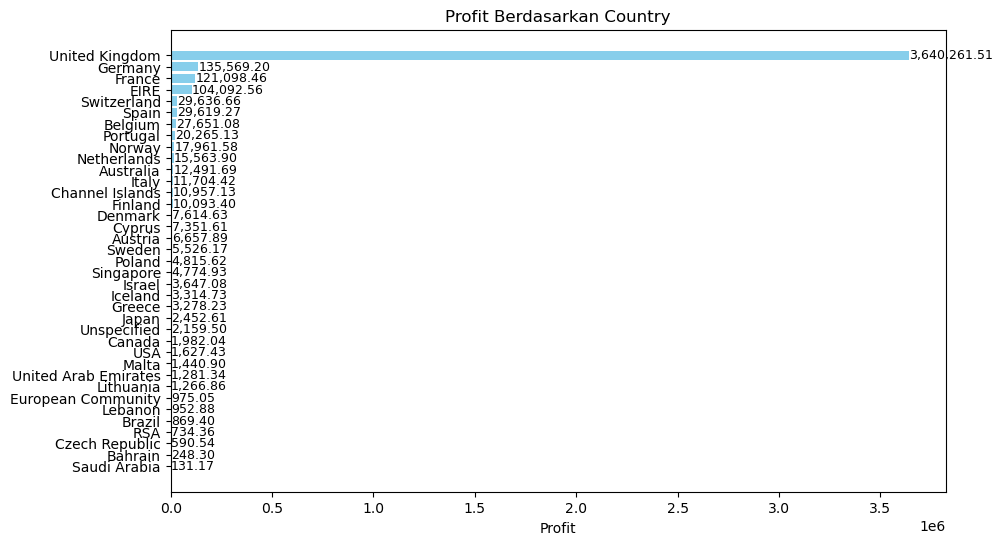

In [31]:
# --- Visualisasi Profit Berdasarkan Country ---
profit_country = df_cleaned.groupby('Country')['Profit'].sum().sort_values()
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(profit_country.index, profit_country.values, color='skyblue')
ax.set_title("Profit Berdasarkan Country")
ax.set_xlabel("Profit")

# Menambahkan label nilai di setiap batang
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height() / 2,
            f'{width:,.2f}', va='center', ha='left', fontsize=9)

plt.show()

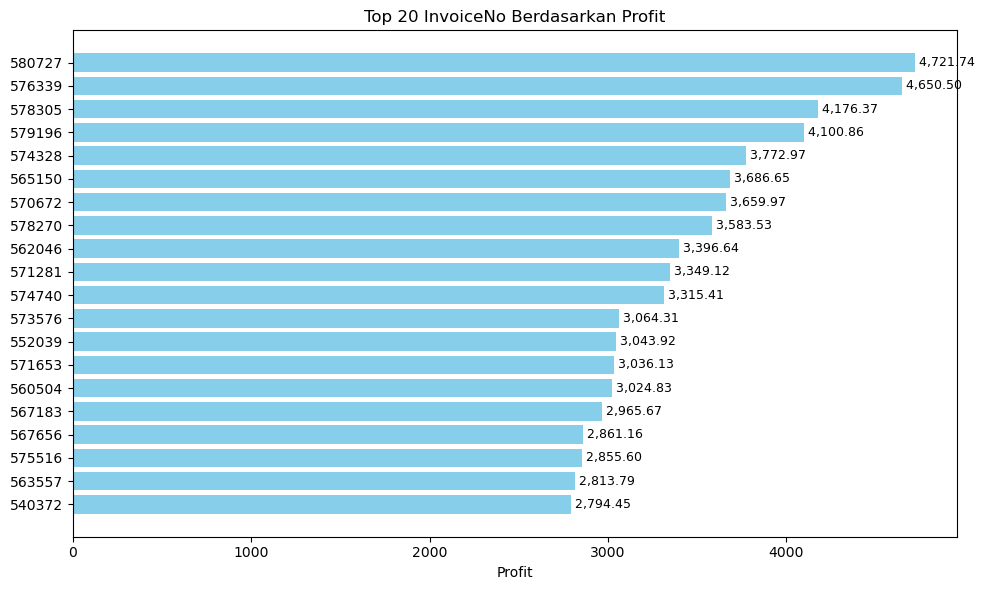

In [35]:
# --- Visualisasi Profit Berdasarkan InvoiceNo ---
# Mengelompokkan profit berdasarkan InvoiceNo dan mengurutkan secara menurun
profit_invoice = df_cleaned.groupby('InvoiceNo')['Profit'].sum().sort_values(ascending=False)

# Ambil 20 nilai tertinggi
top20 = profit_invoice.head(20)

# Buat ranking, sehingga InvoiceNo dengan profit tertinggi mendapat ranking 1
ranking = top20.rank(ascending=False, method='first').astype(int)

# Untuk horizontal bar chart, kita balik urutannya agar nilai tertinggi tampil di atas
top20_plot = top20.iloc[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top20_plot.index, top20_plot.values, color='skyblue')
ax.set_title("Top 20 InvoiceNo Berdasarkan Profit")
ax.set_xlabel("Profit")

# Menambahkan label ranking dan nilai profit di setiap batang
for i, (invoice, profit) in enumerate(top20_plot.items()):
    # Mendapatkan ranking dari series ranking
    rank = ranking[invoice]
    # Menampilkan ranking di sebelah kiri batang
#     ax.text(0, i, f'#{rank}', va='center', ha='right', fontsize=10, color='black', fontweight='bold')
    # Menampilkan nilai profit di ujung batang
    ax.text(profit, i, f' {profit:,.2f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()


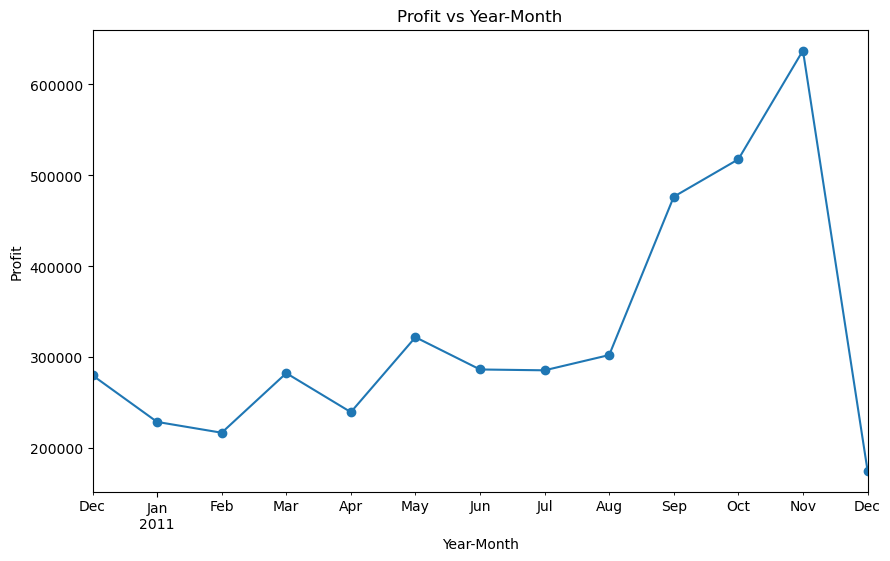

In [28]:
# --- Visualisasi Profit vs Year-Month ---
# Konversi InvoiceDate ke datetime dan ekstrak Year-Month
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
profit_yearmonth = df_cleaned.groupby('YearMonth')['Profit'].sum()
plt.figure(figsize=(16, 12))
profit_yearmonth.plot(kind='line', marker='o')
plt.title("Profit vs Year-Month")
plt.xlabel("Year-Month")
plt.ylabel("Profit")
plt.show()

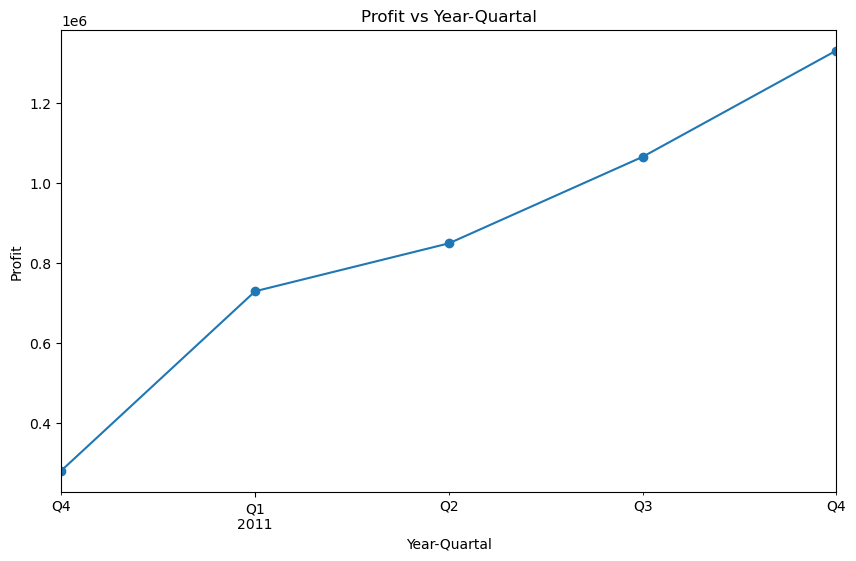

In [29]:
# --- Visualisasi Profit vs Year-Quartal ---
df_cleaned['YearQuarter'] = df_cleaned['InvoiceDate'].dt.to_period('Q')
profit_yearquarter = df_cleaned.groupby('YearQuarter')['Profit'].sum()
plt.figure(figsize=(16, 12))
profit_yearquarter.plot(kind='line', marker='o')
plt.title("Profit vs Year-Quartal")
plt.xlabel("Year-Quartal")
plt.ylabel("Profit")
plt.show()

In [30]:
# import streamlit as st
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Membaca dataset hasil cleaning
# df_cleaned = pd.read_csv('data-cleaned.csv')
# df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
# df_cleaned['Profit'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# # Perhitungan metrik
# total_transactions = len(df_cleaned)
# total_profit = df_cleaned['Profit'].sum()
# total_customers = df_cleaned['CustomerID'].count()
# total_unique_customers = df_cleaned['CustomerID'].nunique()

# st.title("Dashboard Data Analysis")
# st.header("Metrik Utama")
# st.write("**Total Transactions:**", total_transactions)
# st.write("**Total Profit:**", total_profit)
# st.write("**Total Customers:**", total_customers)
# st.write("**Total Unique Customers:**", total_unique_customers)

# # Visualisasi Profit Berdasarkan Country
# profit_country = df_cleaned.groupby('Country')['Profit'].sum().sort_values()
# fig1, ax1 = plt.subplots(figsize=(10, 6))
# profit_country.plot(kind='barh', ax=ax1)
# ax1.set_title("Profit Berdasarkan Country")
# ax1.set_xlabel("Profit")
# st.pyplot(fig1)

# # Visualisasi Profit Berdasarkan InvoiceNo
# profit_invoice = df_cleaned.groupby('InvoiceNo')['Profit'].sum().sort_values()
# fig2, ax2 = plt.subplots(figsize=(10, 6))
# profit_invoice.plot(kind='barh', ax=ax2)
# ax2.set_title("Profit Berdasarkan InvoiceNo")
# ax2.set_xlabel("Profit")
# st.pyplot(fig2)

# # Visualisasi Profit vs Year-Month
# df_cleaned['YearMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')
# profit_yearmonth = df_cleaned.groupby('YearMonth')['Profit'].sum()
# fig3, ax3 = plt.subplots(figsize=(10, 6))
# profit_yearmonth.plot(kind='line', marker='o', ax=ax3)
# ax3.set_title("Profit vs Year-Month")
# ax3.set_xlabel("Year-Month")
# ax3.set_ylabel("Profit")
# st.pyplot(fig3)

# # Visualisasi Profit vs Year-Quartal
# df_cleaned['YearQuarter'] = df_cleaned['InvoiceDate'].dt.to_period('Q')
# profit_yearquarter = df_cleaned.groupby('YearQuarter')['Profit'].sum()
# fig4, ax4 = plt.subplots(figsize=(10, 6))
# profit_yearquarter.plot(kind='line', marker='o', ax=ax4)
# ax4.set_title("Profit vs Year-Quartal")
# ax4.set_xlabel("Year-Quartal")
# ax4.set_ylabel("Profit")
# st.pyplot(fig4)
